In [1]:
# Reads in and plots Peter Bird's Plate boundary data set from a GeoJSON format file
# Data comes from: https://github.com/fraxen/tectonicplates

# Data is kept in ~/<Mybin/Data-Sets/tectonicplates-master
# Uses pygmt for plotting on a global map (can be modified for preferred projection and region)

import json
import numpy as np
import pygmt
from matplotlib.pyplot import cm

In [2]:
# These are not used here but are useful to have defined for many applications
plates = {
    'AF':'Africa','AM':'Amur','AN':'Antarctica','AP':'Altiplano',
    'AR':'Arabia','AS':'Aegean Sea','AT':'Anatolia', 'AU':'Australia',
    'BH':'Birds Head','BR':'Balmoral Reef','BS':'Banda Sea','BU':'Burma',
    'CA':'Caribbean','CL':'Caroline','CO':'Cocos','CR':'Conway Reef',
    'EA':'Easter','EU':'Eurasia','FT':'Futuna','GP':'Galapagos',
    'IN':'India','JF':'Juan de Fuca','JZ':'Juan Fernandez','KE':'Kermadec',
    'MA':'Mariana','MN':'Manus','MO':'Maoke','MS':'Molucca Sea','NA':'North America',
    'NB':'North Bismarck','ND':'North Andes','NH':'New Hebrides','NI':'Niuafo ou',
    'NZ':'Nazca','OK':'Okhotsk','ON':'Okinawa','PA':'Pacific','PM':'Panama',
    'PS':'Philippine Sea','RI':'Rivera','SA':'South America','SB':'South Bismarck',
    'SC':'Scotia','SL':'Shetland','SO':'Somalia','SS':'Solomon Sea',
    'SU':'Sunda','SW':'Sandwich','TI':'Timor','TO':'Tonga','WL':'Woodlark','YA':'Yangtze'
}

In [3]:
# Read the json data file into a dictionary using json library
#dir = '/Users/billen/Box-Sync/Mybin/Data-Sets/tectonicplates-master/GeoJSON/'
dir ='./'
boundaries_json_file = dir + 'PB2002_boundaries.json'

file_object = open(boundaries_json_file,'r')
data = json.load(file_object)

In [4]:
# Information about the dictionary format
# Note 'Type' is either empty or 'subduction'
keys_prop = list(data["features"][0]["properties"].keys())
print(keys_prop)

keys_geom = list(data["features"][0]["geometry"].keys())
print(keys_geom)

# View of first feature in the feature collection:
data["features"][0]

['LAYER', 'Name', 'Source', 'PlateA', 'PlateB', 'Type']
['type', 'coordinates']


{'type': 'Feature',
 'properties': {'LAYER': 'plate boundary',
  'Name': 'AF-AN',
  'Source': 'Mueller et al. [1987]',
  'PlateA': 'AF',
  'PlateB': 'AN',
  'Type': ''},
 'geometry': {'type': 'LineString',
  'coordinates': [[-0.4379, -54.8518],
   [-0.038826, -54.6772],
   [0.443182, -54.4512],
   [0.964534, -54.8322],
   [1.69481, -54.399],
   [2.35975, -54.0374],
   [3.02542, -53.6507],
   [3.36894, -53.8341],
   [3.95638, -54.1267],
   [4.41458, -54.4303],
   [4.82661, -54.1616],
   [5.08372, -54.3093],
   [5.49469, -54.5429],
   [6.18373, -54.1145],
   [6.6254, -53.8142],
   [7.23729, -54.1012],
   [7.77235, -54.396]]}}

In [5]:
# Get an earth topography to use as base-map
grid = pygmt.datasets.load_earth_relief(resolution="10m",registration="gridline")
pygmt.config(FONT='Times-Roman')
pygmt.config(FONT_LABEL='Times-Roman,12p')

In [6]:
# Basic global map in gmt
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=True)
fig.grdimage(grid=grid,cmap="gray")
fig.coast(shorelines="1/0.5p,black")

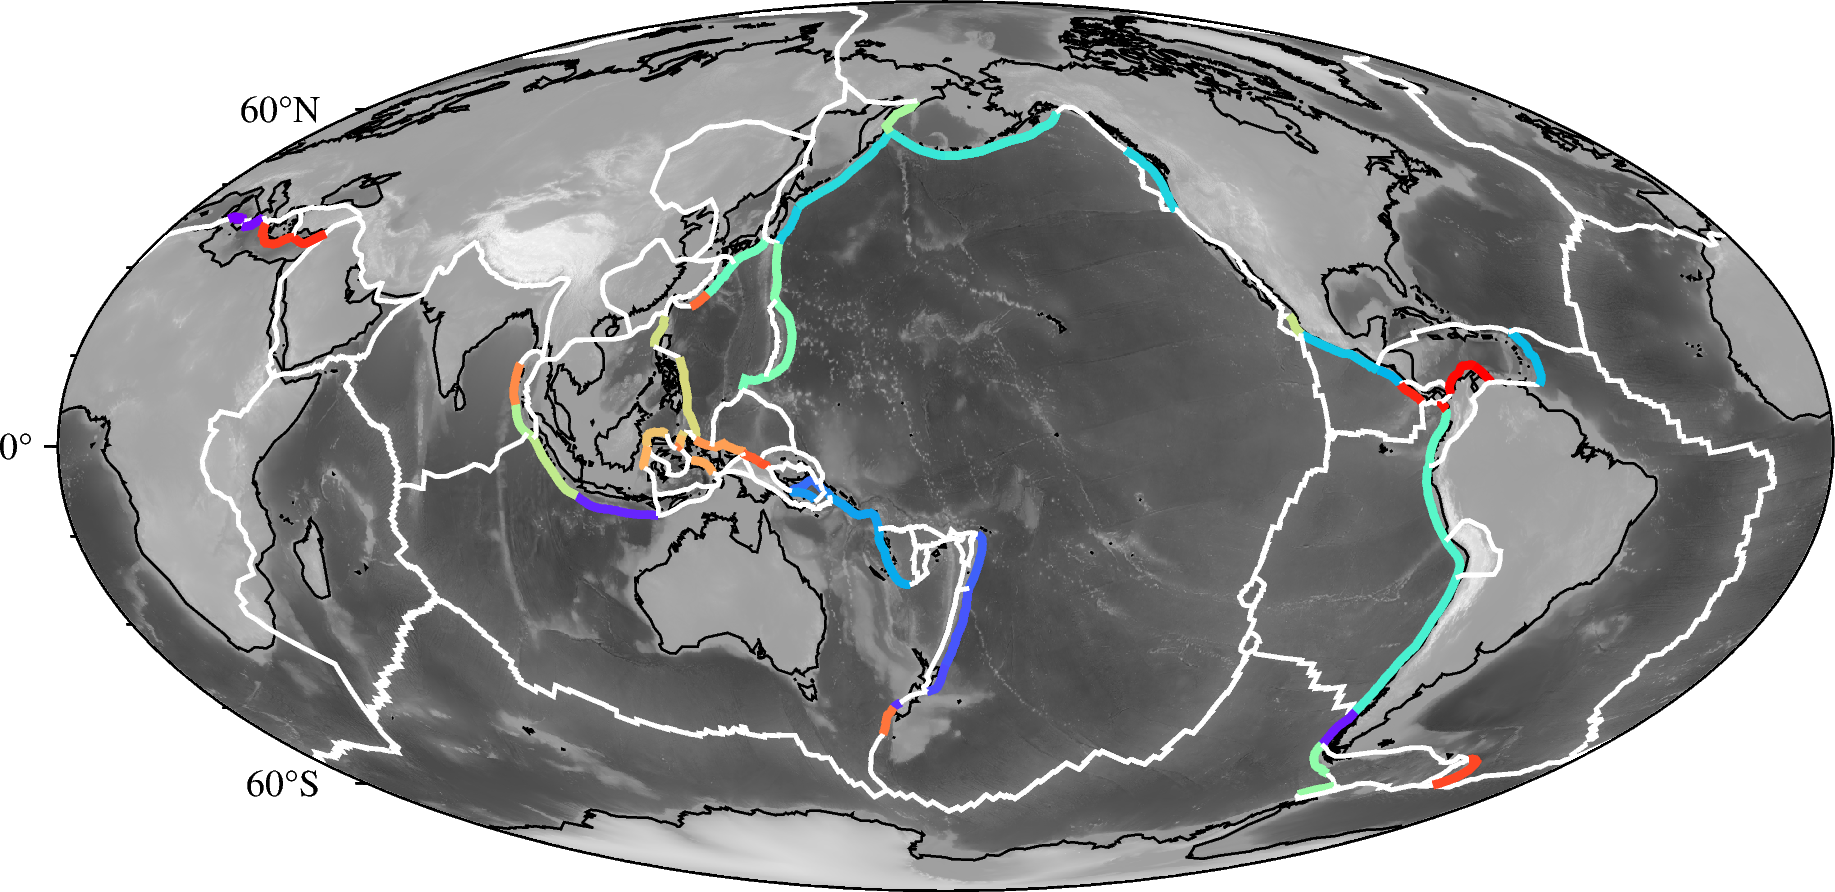

In [7]:
# Loop through each features in the feature collection
sublist = [ ];  # list of features that are subduction zones
for i in range(len(data["features"])):
    # Check if Type = 'subduction' and plot as cyan
    if 'subduction' in data["features"][i]["properties"].values():
        sublist.extend([i])
n = len(sublist)
color = iter(cm.rainbow(np.linspace(0, 1, n)))

for i in range(len(data["features"])):
    # Check if Type = 'subduction' and plot as cyan
    if 'subduction' in data["features"][i]["properties"].values():

        # Reads list of coordinates and converts to a n x 2 array
        coords = np.array(data["features"][i]["geometry"]["coordinates"])
        c = next(color)
        rgb = str(int(255*c[0])) + '/' + str(int(255*c[1])) + '/' + str(int(255*c[2]))
        pen1 = '2p,' + rgb  # for use in pygmt
        fig.plot(x=coords[:,0],y=coords[:,1], pen=pen1)
    # If not "subduction" plot as a white line
    if 'subduction' not in data["features"][i]["properties"].values():
        coords = np.array(data["features"][i]["geometry"]["coordinates"])
        fig.plot(x=coords[:,0],y=coords[:,1], pen="1p,white")  
fig.show()


In [8]:
print('Number of subduction zones segments: ',len(sublist))
# Save figure to file
fig.savefig('map_bird_plate_boundaries.png')

Number of subduction zones segments:  65


dict_values(['plate boundary', 'CA\\ND', 'Perez et al. [1997]', 'CA', 'ND', 'subduction'])


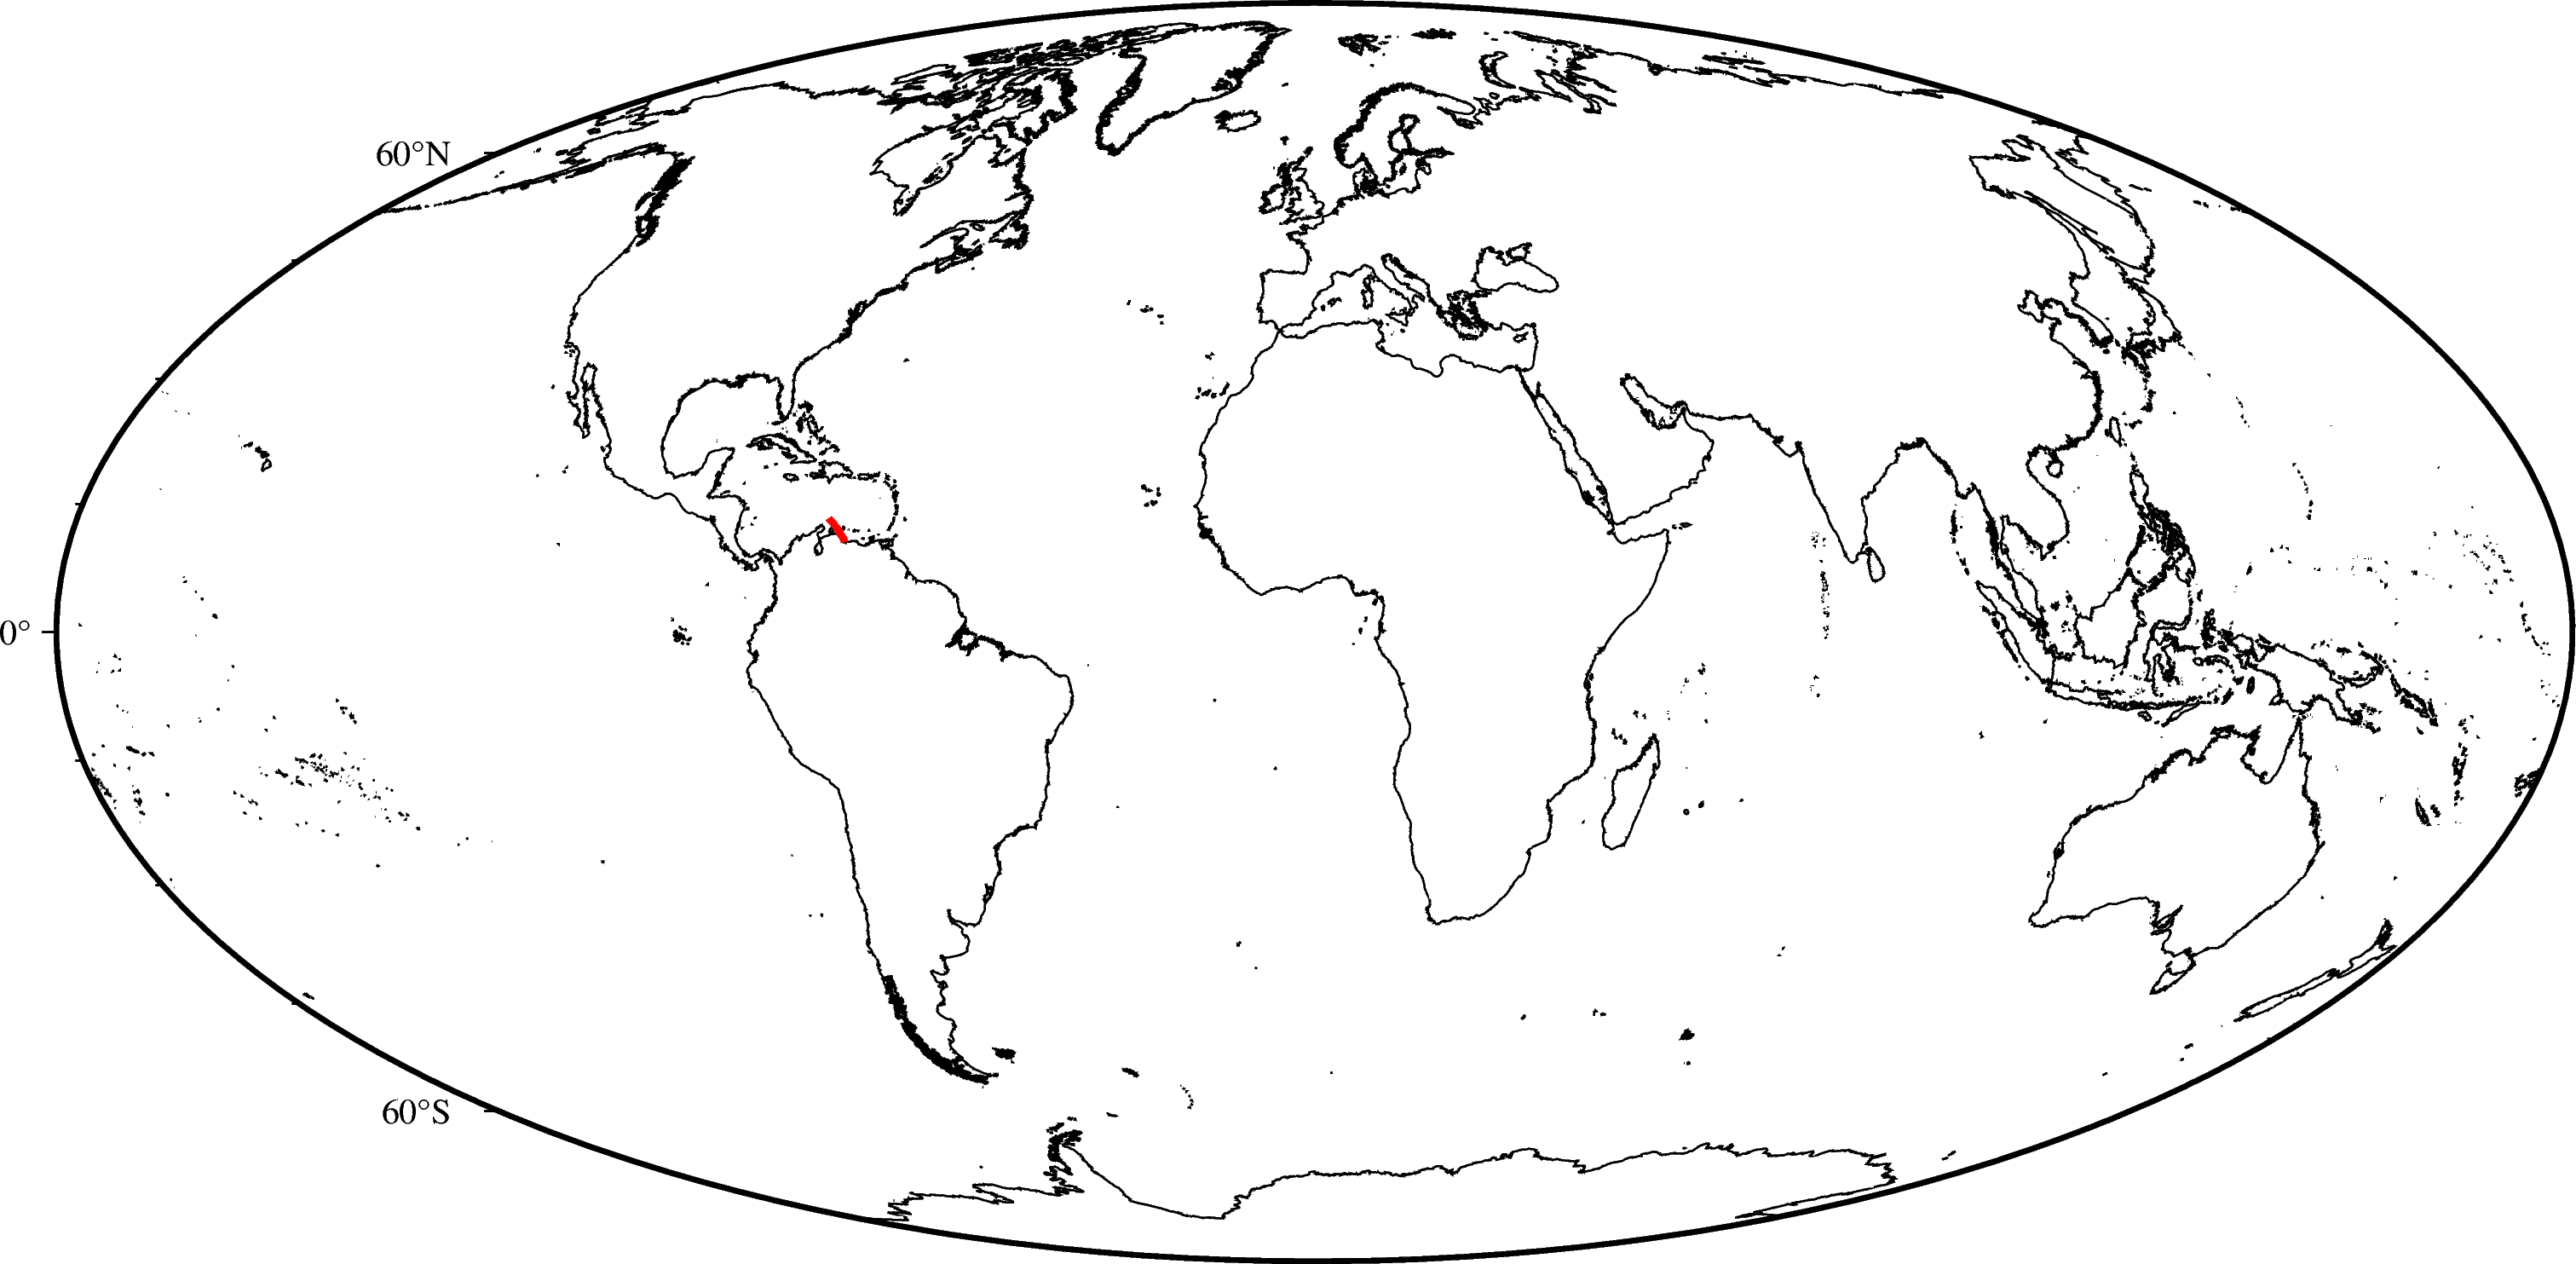

In [9]:
# To plot just one section of plate boundary at a time
fig1 = pygmt.Figure()
fig1.basemap(region="d", projection="W0/25c",frame=True)
fig1.coast(shorelines="1/0.5p,black",resolution="i")

nslab = [64]

for j in range(len(nslab)):
    n = nslab[j]
    i = sublist[n]
    print(data["features"][i]["properties"].values())
    # Reads list of coordinates and converts to a n x 2 array
    coords = np.array(data["features"][i]["geometry"]["coordinates"])
    fig1.plot(x=coords[:,0],y=coords[:,1], pen="2p,red")
fig1.show()